In [42]:
## Michael Orth, Section C

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [43]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd

pp_df = pd.read_csv('https://raw.githubusercontent.com/GettysburgDataScience/ps05-MichaelOrth6/refs/heads/main/titanic.csv')
pp_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [45]:
'''your code here'''

df = pd.read_csv('titanic.csv')

total_passengers = df.shape[0]
male_percentage = (df[df['Sex'] == 1].shape[0] / total_passengers) * 100
survived_percentage = (df[df['Survived'] == 1].shape[0] / total_passengers) * 100

print (total_passengers)
print (male_percentage)
print (survived_percentage)

891
64.75869809203144
38.38383838383838


Your written answer:

 - <Answer 1> 891
 - <Answer 2> 64.76
 - <Answer 3> 38.38

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [47]:
'''your code here'''
df = pd.read_csv('titanic.csv')

female_survived_percentage = (df[(df['Sex'] == 0) & (df['Survived'] == 1)].shape[0] / df[df['Survived'] == 1].shape[0]) * 100
male_survived_percentage = (df[(df['Sex'] == 1) & (df['Survived'] == 1)].shape[0] / df[df['Survived'] == 1].shape[0]) * 100

print (female_survived_percentage)
print (male_survived_percentage)

68.12865497076024
31.871345029239766


Your written answer:

 - <Answer 1> 68.13%
 - <Answer 2> 31.87%

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [48]:
'''your code here'''
#this groups the classes and calc the percentages
ticket_class = df['Pclass'].value_counts(normalize=True) * 100
survivorship_class = df.groupby('Pclass')['Survived'].mean() * 100
#combines results
results = pd.DataFrame({
    '% tickets' : ticket_class,
    '% survivorship' : survivorship_class
}).sort_index()

print(results)

        % tickets  % survivorship
Pclass                           
1       24.242424       62.962963
2       20.650954       47.282609
3       55.106622       24.236253


Your written answer:

 - Class 1 
    - % tickets: 24.24%
    - % survivorship: 62.96%
- Class 2 
    - % tickets: 20.65%
    - % survivorship: 47.29%
- Class 3
    - % tickets: 55.11%
    - % survivorship: 24.24%


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

In [54]:
'''Your code here'''
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")

survivors = df[df['Survived'] == 1][['Age', 'Name', 'Sex']]
non_survivors = df[df['Survived'] == 0][['Age', 'Name', 'Sex']]

# first 5 rows
print("Survivors:\n", survivors.head())
print("\nNon-Survivors:\n", non_survivors.head())

Survivors:
     Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0

Non-Survivors:
     Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [19]:
'''Your code here'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

features = ['Age', 'Sex']
label = ['Survived']

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_df[features], titanic_df[label], test_size = 0.2)

In [21]:
ss = StandardScaler()

ss.fit(X_train)

Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

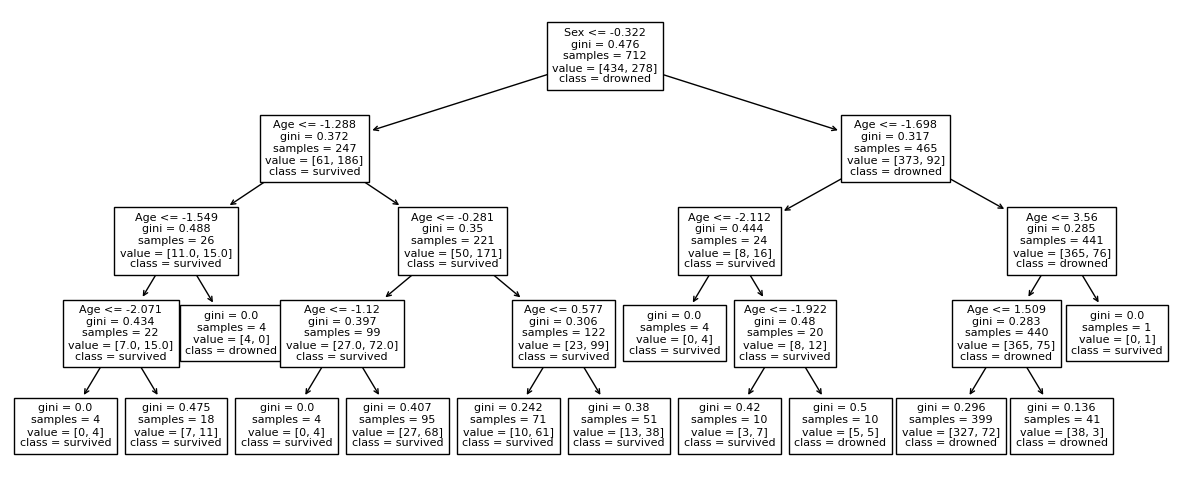

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 1)
tree_clf.fit(Xs_train, y_train)

plt.figure(figsize=(15, 6))
plot_tree(tree_clf,
          class_names = ['drowned', 'survived'],
          feature_names = ['Age', 'Sex'],
          fontsize = 8)

plt.show()

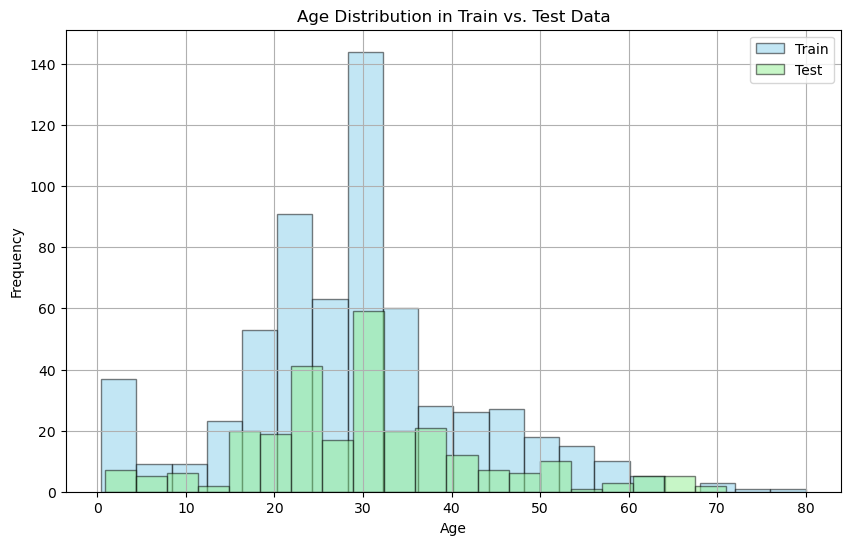

In [58]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://raw.githubusercontent.com/GettysburgDataScience/ps05-MichaelOrth6/refs/heads/main/titanic.csv"
data = pd.read_csv(url)

# Drop rows with missing 'Age' values to avoid issues with plotting
# (You could also fill missing values, but here we'll drop them for simplicity)
data = data.dropna(subset=['Age'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 1: Plot histograms comparing the 'Age' distribution in the train and test sets

# Plot for training set
plt.figure(figsize=(10, 6))
plt.hist(X_train['Age'], bins=20, alpha=0.5, label='Train', color='skyblue', edgecolor='black')

# Plot for testing set
plt.hist(X_test['Age'], bins=20, alpha=0.5, label='Test', color='lightgreen', edgecolor='black')

# Adding labels and title
plt.title('Age Distribution in Train vs. Test Data')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - The data on the training is a lot more frequent than the data on the test.


Which models did you fit and which worked better?
 
 - I used a histogram and a decision tree, I think the histogram showed the difference between test and training way better.